# IPL Score Prediction by using Deep Learning Technique

In [1]:
# importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [30]:
# loading the dataset
ipl_data=pd.read_csv(r"C:\Users\20001\OneDrive\Desktop\Skill Nation Course\Data Science with Python\Datasets\ipl_data.csv")
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
# shape of the data :
print(f"Our Dataset has {ipl_data.shape[0]} number of rows and {ipl_data.shape[1]} number of columns")

Our Dataset has 76014 number of rows and 15 number of columns


In [4]:
# info the data :
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [31]:
ipl_data.corr()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,1.000000,0.026470,-0.055220,0.002487,0.045320,-0.031886,0.033432,0.049975,0.096586
runs,0.026470,1.000000,0.591007,0.938154,0.750565,0.297768,0.594818,0.315422,0.254498
wickets,-0.055220,0.591007,1.000000,0.755240,0.242942,0.693740,0.019712,-0.171962,-0.337343
overs,0.002487,0.938154,0.755240,1.000000,0.629374,0.382850,0.477508,0.236430,0.022282
runs_last_5,0.045320,0.750565,0.242942,0.629374,1.000000,0.058672,0.675924,0.501475,0.368253
wickets_last_5,-0.031886,0.297768,0.693740,0.382850,0.058672,1.000000,-0.214576,-0.421250,-0.273475
striker,0.033432,0.594818,0.019712,0.477508,0.675924,-0.214576,1.000000,0.554439,0.381664
non-striker,0.049975,0.315422,-0.171962,0.236430,0.501475,-0.421250,0.554439,1.000000,0.293233
total,0.096586,0.254498,-0.337343,0.022282,0.368253,-0.273475,0.381664,0.293233,1.000000


# Dropping Unwanted Columns

In [5]:
ipl_data = ipl_data.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)
ipl_data.shape

(76014, 6)

# Descriptive Statistics

In [6]:
# splitting the columns :
catcol=[]
numcol=[]

for i in ipl_data.columns:
    if ipl_data[i].dtype=="object":
        catcol.append(i)
    else:
        numcol.append(i)
        
print("Categorical Columns are",catcol)
print("Numerical Columns are",numcol)

Categorical Columns are ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']
Numerical Columns are ['total']


In [7]:
# five number summary for numerical columns :
ipl_data[numcol].describe()

,total
count,76014.000000
mean,160.901452
std,29.246231
min,67.000000
25%,142.000000
50%,162.000000
75%,181.000000
max,263.000000


In [8]:
# five number summary for categorical columns :
ipl_data[catcol].describe().T

,count,unique,top,freq
venue,76014,35,M Chinnaswamy Stadium,7443
bat_team,76014,14,Mumbai Indians,10213
bowl_team,76014,14,Delhi Daredevils,10245
batsman,76014,411,SK Raina,1921
bowler,76014,329,Harbhajan Singh,1404


In [9]:
# More information about categorical columns :
for i in catcol:
    print(i)
    print(ipl_data[i].value_counts())
    print("\n")

venue
M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket

# Dividing the data into Input and Target Value

In [10]:
# Input Variable :
X=ipl_data.drop(["total"],axis=1)

In [11]:
# Target Variable
y = ipl_data['total']

# Label Encoding

In [12]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


# Splitting Data into Train and Test Set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

# Scaling Training Set

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

# Defining Neural Netwrok

In [15]:
# We have defined a neural network using TensorFlow and Keras for regression.
# After defining the model, we have compiled the model using the Huber Loss because of the robustness of the regression 
# against outliers.

In [16]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

# Model Training

In [17]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 55.3100 - val_loss: 22.1830
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2619 - val_loss: 22.1233
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2880 - val_loss: 21.9667
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.3201 - val_loss: 21.9925
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2350 - val_loss: 21.9557
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2105 - val_loss: 22.0097
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.1558 - val_loss: 21.9275
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2271 - val_loss: 21.8801
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.0666 - val_loss: 21.8221
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.0614 - val_loss: 21.8267
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.0098 - val_loss: 22.2504
Epoch 12/50
832/832 ━━━━━━━━━━

In [18]:
# After the training, we have stored the training and validation loss values to our neural network during the training process.

<Axes: >

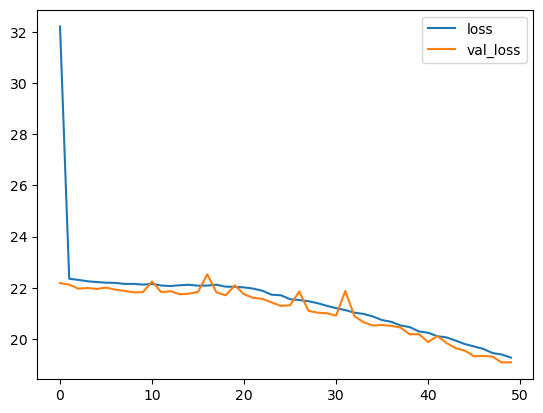

In [19]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

# Model Evaluation

In [20]:
# We have predicted using the trained neural network on the testing data.
# The variable predictions contains the predicted total run scores for the test set based on the model’s learned patterns.

In [21]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


19.582292557013606

In [32]:
model.score(x_test,y_test)

AttributeError: 'Sequential' object has no attribute 'score'

# Creation of Interactive Widget

In [22]:
# We have created an interactive widget using ipywidgets to predict the score based on user input for venue, batting team, 
# bowling team, striker, and bowler.

In [23]:
# We have created dropdown widgets to select values for venue, batting team, bowling team, striker, and bowler.

In [24]:
# Then, we have added a “Predicted Score” button widget. Whenever, the button will be clicked, the predict_score function will 
# be called and then perform the following steps:

In [25]:
## Decodes the user-selected values to their original categorical values.
## Encodes and scales these values to match the format used in model training.
## Uses the trained model to make a prediction based on the user’s input.
## Displays the predicted score.

In [26]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=ipl_data['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =ipl_data['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=ipl_data['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=ipl_data['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=ipl_data['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [27]:
# The widget-based interface allows you to interactively predict the score for specific match scenarios. Now, we have set up 
# the button to trigger the predict_score function when clicked and display the widgets for venue, batting team , bowling team,
# striker and bowler.

In [28]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()